VGON_nqd7_20241016_031815.mat, Energy: -3.94065197, Cos_Sim: 1.00000000


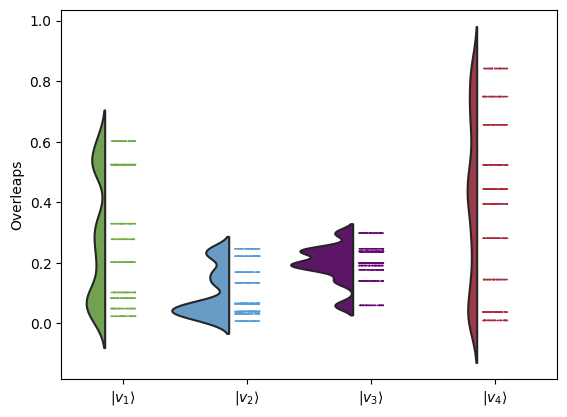

VGON_nqd7_20241012_115417.mat, Energy: -2.94132256, Cos_Sim: 0.10839088


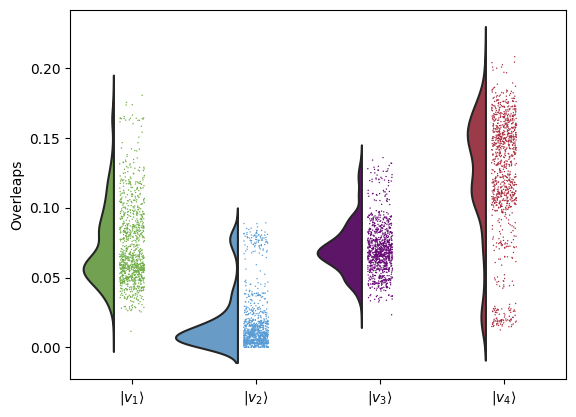

VGON_nqd7_20241012_025835.mat, Energy: -2.41857671, Cos_Sim: 0.36767569


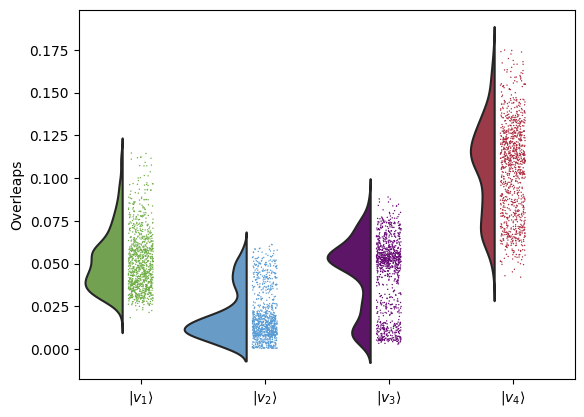

VGON_nqd7_20241011_230226.mat, Energy: -2.19626950, Cos_Sim: -0.06309957


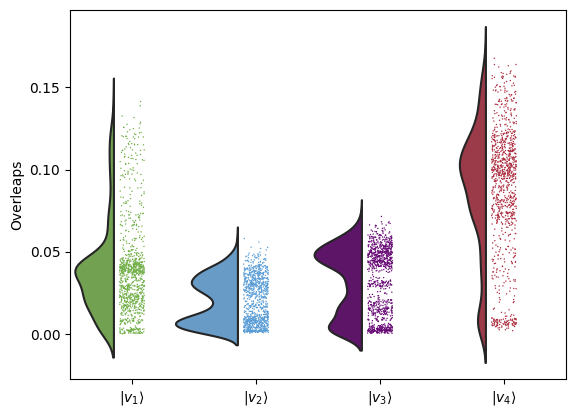

VGON_nqd7_20241011_024512.mat, Energy: -2.59288992, Cos_Sim: 0.07731670


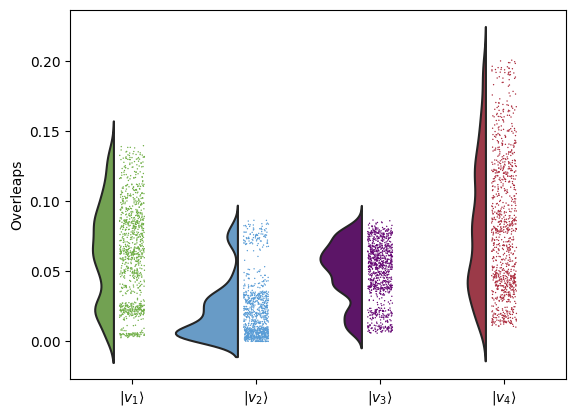

VGON_nqd7_20241010_233507.mat, Energy: -2.57090810, Cos_Sim: 0.02182791


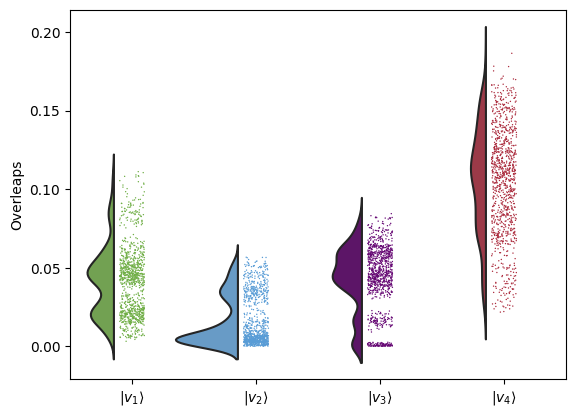

VGON_nqd7_20241010_121707.mat, Energy: -2.38574407, Cos_Sim: 0.06682548


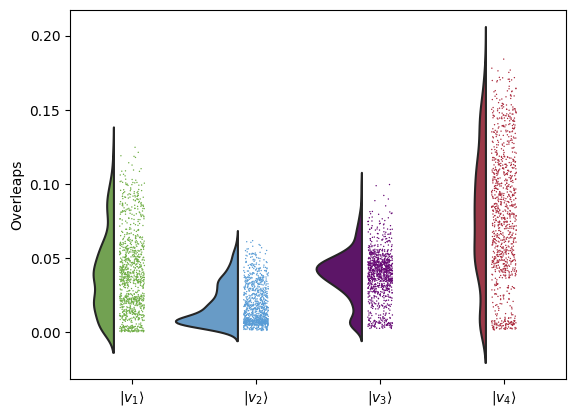

VGON_nqd7_20241010_031547.mat, Energy: -3.77237582, Cos_Sim: 0.99999934


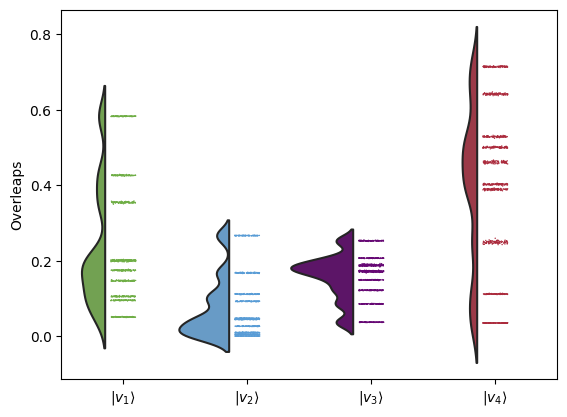

VGON_nqd7_20241010_012921.mat, Energy: -3.84883246, Cos_Sim: 0.99999899


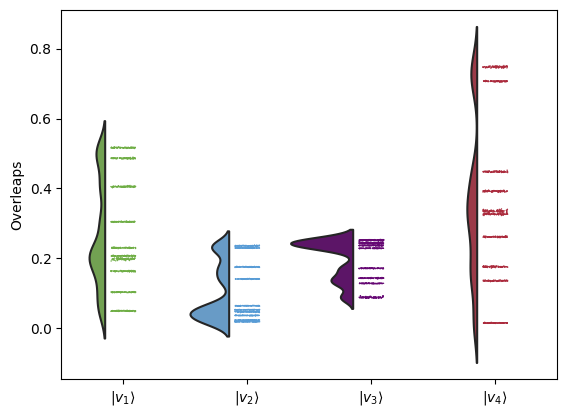

VGON_nqd7_20241009_233530.mat, Energy: -2.44201209, Cos_Sim: 0.08778676


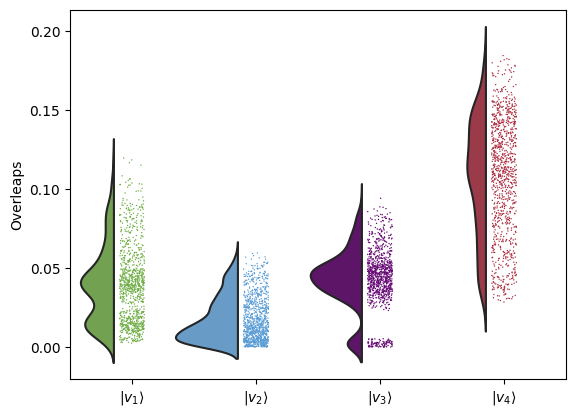

VGON_nqd6_20241016_185128.mat, Energy: -3.21271699, Cos_Sim: 0.99999994


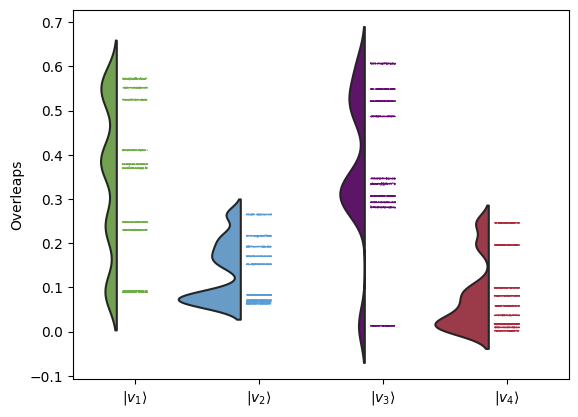

In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
from scipy.io import loadmat
import matplotlib.pyplot as plt
# pandas==1.5.3
# seaborn==0.11
# ptitprince==0.2.7
# matplotlib==3.8.4


def plot(overlaps: np.ndarray):
    data = {
        r'$|v_1\rangle$': overlaps[:, 0],
        r'$|v_2\rangle$': overlaps[:, 1],
        r'$|v_3\rangle$': overlaps[:, 2],
        r'$|v_4\rangle$': overlaps[:, 3],
    }
    colors = ['#6FAE45', '#589CD6', '#660874', '#AB2A3C']  #4474C4
    df = pd.DataFrame(data)

    pt.half_violinplot(data=df, inner=None, width=1, palette=colors, color='white')
    sns.stripplot(data=df, jitter=True, palette=colors, size=1, edgecolor='none')
    plt.ylabel('Overleaps')
    plt.show()


pattern = r'(VGON_nqd\d+_\d{8}_\d{6}).mat'
for name in sorted(os.listdir('./mats'), reverse=True):
    match = re.search(pattern, name)
    if match:
        path = f'./mats/{match.group(1)}'
        load = loadmat(f'{path}.mat')
        energy = load['energy'].item()
        n_qudits = int(re.search(r'nqd(\d+)', path).group(1))
        ground_state_energy = -2 / 3 * (n_qudits - 1)
        energy_gap = energy - ground_state_energy
        if 'overlaps' in load and energy_gap < 2:
            overlaps = load['overlaps']
            try:
                cos_sim = load['cos_sim'].item()
                print(f'{name}, Energy: {energy:.8f}, Cos_Sim: {cos_sim:.8f}')
                plot(overlaps)
            except KeyError:
                pass

In [ ]:
import scipy.io as sio
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# load data
name = 'MG_re_plot'
data = sio.loadmat(os.path.join(sys.path[0], 'Data', name + '.mat'))
data = data['m']

data = {
    r'$|v_1 \rangle$': data[:, 0],
    r'$|v_2 \rangle$': data[:, 1],
    r'$|v_3 \rangle$': data[:, 2],
    r'$|v_4 \rangle$': data[:, 3],
    r'$|v_5 \rangle$': data[:, 4],
}
# colors = ['#B5C6E7', '#BED8EF', '#C6E1B8', '#AB2A3C', '#660874']
colors = ['#6FAE45', '#589CD6', '#4474C4', '#660874', '#AB2A3C']
# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate statistics using DataFrame
stats = df.describe()
print(stats)

# Create raincloud plot
fig, ax = plt.subplots()
ax = pt.half_violinplot(data=df, inner=None, width=1, palette=colors, edgecolor='white')
ax = sns.stripplot(data=df, jitter=True, edgecolor='none', size=1.2, palette=colors)
# ax = sns.boxplot(data=df,width = 0.25, zorder = 10,  whiskerprops = {'linewidth':1.5, 'zorder':10}, boxprops = {'facecolor':'none', 'zorder':10} ,palette=colors)

plt.ylim(-0.1, 1)
# Add grid to the plot
plt.grid(True)
# Set plot labels and title
ax.set_ylabel('Overlap')

# plt.title('Raincloud Plot')

# Show the plot
# plt.show()

# Calculate statistics for each group

# savefig
path = os.path.join(sys.path[0], 'Image', '1MG_Box.pdf')
plt.savefig(path, format='pdf', bbox_inches='tight')
path = os.path.join(sys.path[0], 'Image', '1MG_Box.png')
plt.savefig(path, format='jpg', bbox_inches='tight')